# 🚗 Araba Fiyat Tahmini – Lineer Regresyon Projesi
**Hazırlayan:** Tolgacan Kaya  
**Konu:** Veri Madenciliği – Araba Özelliklerine Göre Fiyat Tahmini  
**Yöntem:** Lineer Regresyon

In [667]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [668]:
df = pd.read_csv("car_price.csv")
df.columns = df.columns.str.strip()
df = df.drop(['Name', 'New_Price'], axis=1)
df = df.dropna(subset=['Price'])

In [669]:
df

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
1,2,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,4.50
2,3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
3,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
4,6,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5843,6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5844,6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5845,6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [670]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Location           5847 non-null   object 
 2   Year               5847 non-null   int64  
 3   Kilometers_Driven  5847 non-null   int64  
 4   Fuel_Type          5847 non-null   object 
 5   Transmission       5847 non-null   object 
 6   Owner_Type         5847 non-null   object 
 7   Mileage            5845 non-null   object 
 8   Engine             5811 non-null   object 
 9   Power              5811 non-null   object 
 10  Seats              5809 non-null   float64
 11  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 548.3+ KB
None
        Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  5847.000000  5847.000000       5.847000e+03  5809.000000  5847.00000

In [671]:
print(df.isnull().sum())

Unnamed: 0            0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                38
Price                 0
dtype: int64


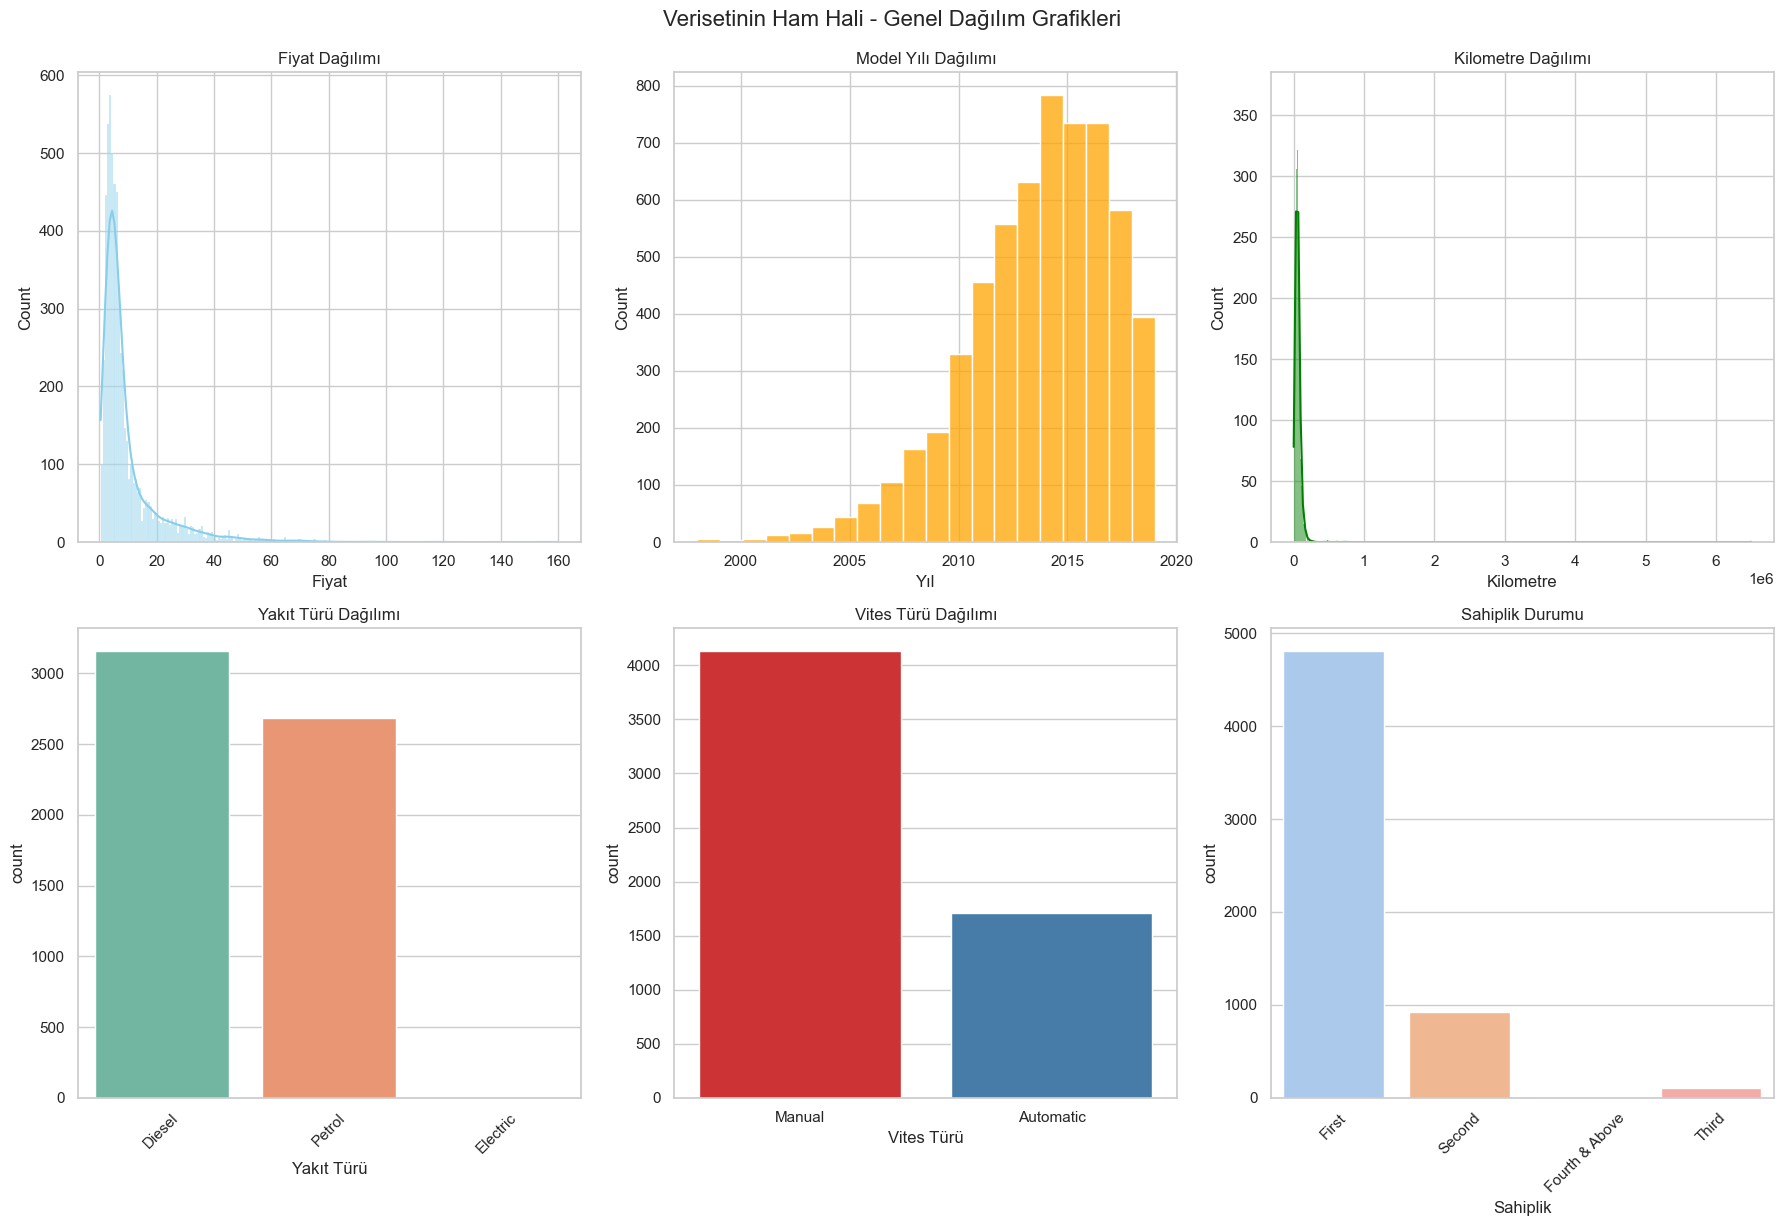

In [672]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# 1. Fiyat Dağılımı
plt.subplot(2, 3, 1)
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')

# 2. Yıl Dağılımı
plt.subplot(2, 3, 2)
sns.histplot(df['Year'], kde=False, bins=20, color='orange')
plt.title('Model Yılı Dağılımı')
plt.xlabel('Yıl')

# 3. Kilometre Dağılımı
plt.subplot(2, 3, 3)
sns.histplot(df['Kilometers_Driven'], kde=True, color='green')
plt.title('Kilometre Dağılımı')
plt.xlabel('Kilometre')

# 4. Yakıt Türü
plt.subplot(2, 3, 4)
sns.countplot(x='Fuel_Type', data=df, hue='Fuel_Type', palette='Set2', legend=False)
plt.title('Yakıt Türü Dağılımı')
plt.xlabel('Yakıt Türü')
plt.xticks(rotation=45)

# 5. Vites Türü
plt.subplot(2, 3, 5)
sns.countplot(x='Transmission', data=df, hue='Transmission', palette='Set1', legend=False)
plt.title('Vites Türü Dağılımı')
plt.xlabel('Vites Türü')

# 6. Sahiplik Türü
plt.subplot(2, 3, 6)
sns.countplot(x='Owner_Type', data=df, hue='Owner_Type', palette='pastel', legend=False)
plt.title('Sahiplik Durumu')
plt.xlabel('Sahiplik')
plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Verisetinin Ham Hali - Genel Dağılım Grafikleri', fontsize=16, y=1.02)
plt.show()

In [673]:
# 'Mileage', 'Engine' ve 'Power' sütunlarında sayısal değerleri ayıklamak gerekiyor,
# çünkü genelde bunlar "20 kmpl", "1197 CC" gibi yazılmış oluyor.
def extract_num(x):
    if isinstance(x, str):
        try:
            return float(x.split()[0])
        except:
            return np.nan
    return x

In [674]:
# 'Mileage', 'Engine' ve 'Power' sütunlarındaki metin verilerden sadece sayısal kısmı alıp float'a çeviririz,
# sayısal olmayan veya eksik değerleri medyan ile doldur,
# 'Seats' sütunundaki eksik verileri de medyan ile tamamla,
# araçların yaşını (2025 yılına göre) hesapla ve 'Year' sütununu veri setinden çıkar.

df['Mileage'] = df['Mileage'].apply(extract_num)
df['Engine'] = df['Engine'].apply(lambda x: float(str(x).split()[0]) if pd.notnull(x) else np.nan)
df['Power'] = df['Power'].apply(lambda x: float(str(x).split()[0]) if pd.notnull(x) and str(x).split()[0].replace('.', '', 1).isdigit() else np.nan)
for col in ['Mileage', 'Engine', 'Power', 'Seats']:
    df[col] = df[col].fillna(df[col].median())
df['Age'] = 2025 - df['Year']
df = df.drop('Year', axis=1)

In [675]:
# Kategorik ve sayısal sütunları ayırıyoruz ki preprocessing kolay olsun.
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Price_Class']]
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Price']]

In [676]:
# 1) Lineer Regresyon Modeli

X_reg = df.drop('Price', axis=1)
y_reg = df['Price']

In [677]:
# Kategorik değişkenleri işlemek için pipeline,OneHotEncoding ile kategorik verileri sayısal hale getiriyoruz.
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [678]:
# Veriyi ön işleme adımlarından geçirip ardından LinearRegression modelini eğiten pipeline oluşturdum.

reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [679]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

In [680]:
r2 = r2_score(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

print(f"R2 skoru: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")

R2 skoru: 0.731
RMSE: 5.608
MSE: 31.445
MAE: 3.650


In [681]:
#Tahmin ve gerçek sonuçları karşılaştıran bir tablo
df_compare = pd.DataFrame({
    'Gerçek Fiyat': y_test_reg,
    'Tahmini Fiyat': y_pred_reg,
    'Fark': abs(y_test_reg - y_pred_reg)
})
print(df_compare.sort_values(by='Fark', ascending=False).head(10))

      Gerçek Fiyat  Tahmini Fiyat       Fark
5620        120.00      71.405227  48.594773
2251         78.80      39.400201  39.399799
776          56.00      25.990407  30.009593
4921         58.91      29.054399  29.855601
1873          9.99      37.609121  27.619121
297          57.00      29.633553  27.366447
5839          4.75      31.419470  26.669470
453          51.43      26.097265  25.332735
183          55.76      30.471420  25.288580
4522         52.00      27.599848  24.400152


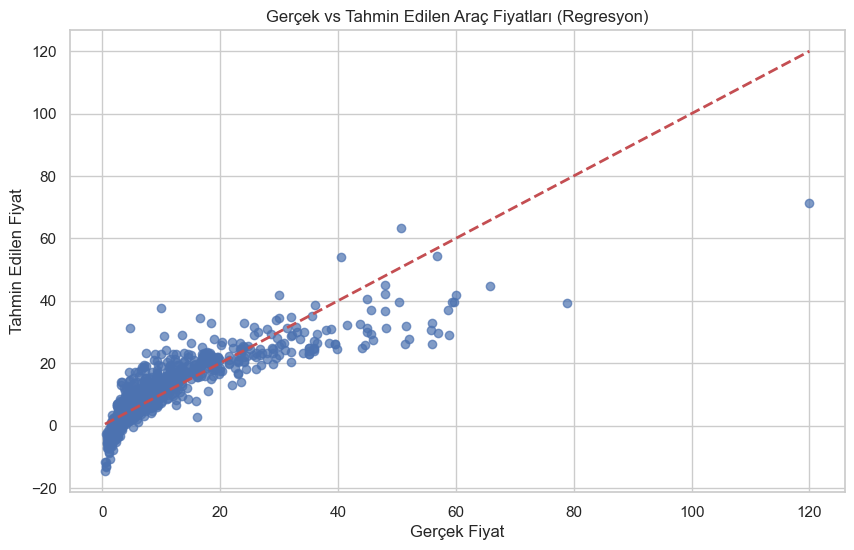

In [682]:
# Gerçek vs Tahmin edilen fiyat grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen Araç Fiyatları (Regresyon)")
plt.grid(True)
plt.show()

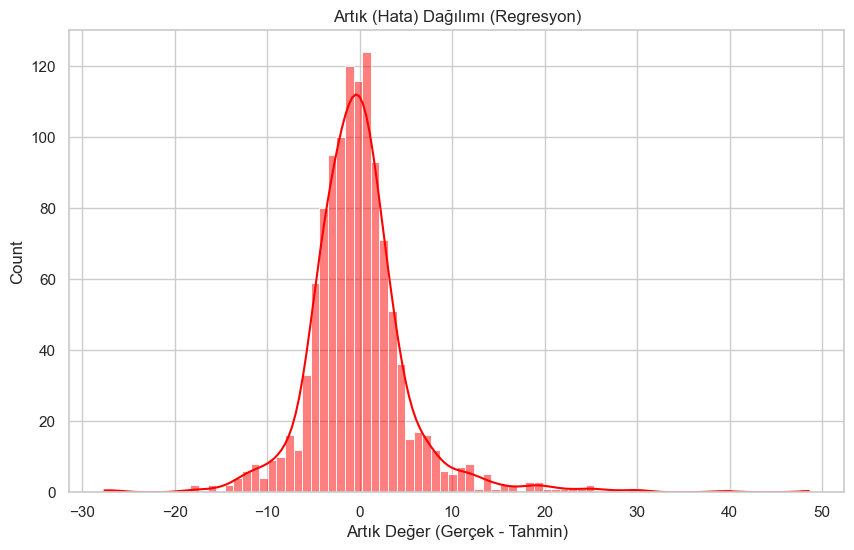

In [683]:
# Artık (hata) dağılımı grafiği tahminlerimizin nasıl saptığını görmek için kullanabiliriz.
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='red')
plt.title("Artık (Hata) Dağılımı (Regresyon)")
plt.xlabel("Artık Değer (Gerçek - Tahmin)")
plt.show()

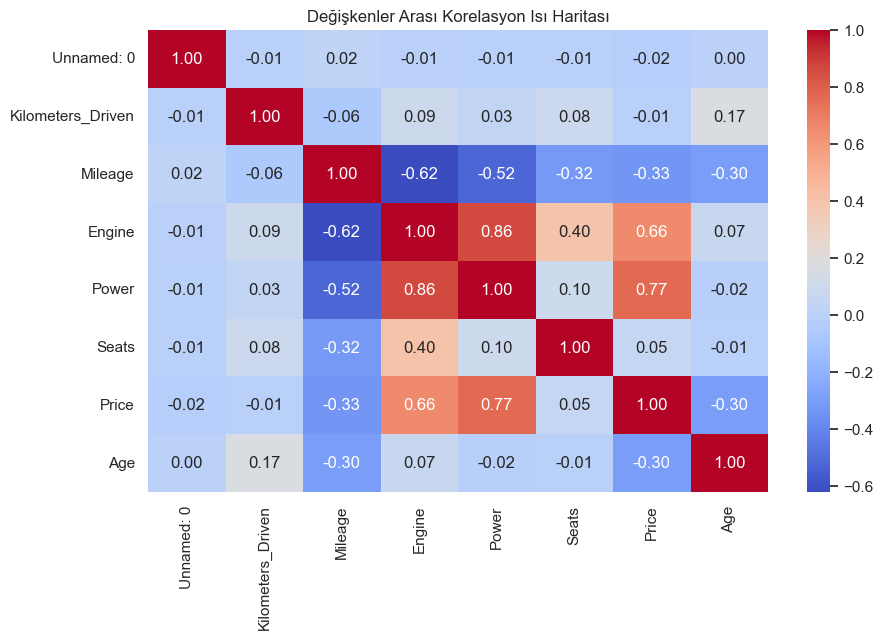

In [684]:
# Korelasyon ısı haritası
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Değişkenler Arası Korelasyon Isı Haritası")
plt.show()

In [685]:
# 2) Sınıflandırma Modeli

# Fiyatı kategorilere böldük.
df['Price_Class'] = pd.qcut(df['Price'], q=3, labels=['Düşük', 'Orta', 'Yüksek'])
X_clf = df.drop(['Price', 'Price_Class'], axis=1)
y_clf = df['Price_Class']

In [686]:
# LabelEncoder ile sınıf isimlerini sayısal hale getiriyoruz.
le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)

In [687]:
# Yine eğitim ve test olarak bölüyoruz ama bu sefer sınıflandırma için
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf_encoded, test_size=0.2, random_state=42, stratify=y_clf_encoded)


In [688]:
# Pipeline: aynı preprocessing, ardından Random Forest sınıflandırıcı
clf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [689]:
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)


In [690]:
# Tahmin ve gerçek sınıf etiketlerini tekrar isimlerine çeviriyoruz.
y_test_labels = le.inverse_transform(y_test_clf)
y_pred_labels = le.inverse_transform(y_pred_clf)


In [691]:
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.8666666666666667

Confusion Matrix:
 [[344  52   1]
 [ 40 320  24]
 [  1  38 350]]

Classification Report:
               precision    recall  f1-score   support

       Düşük       0.89      0.87      0.88       397
        Orta       0.78      0.83      0.81       384
      Yüksek       0.93      0.90      0.92       389

    accuracy                           0.87      1170
   macro avg       0.87      0.87      0.87      1170
weighted avg       0.87      0.87      0.87      1170



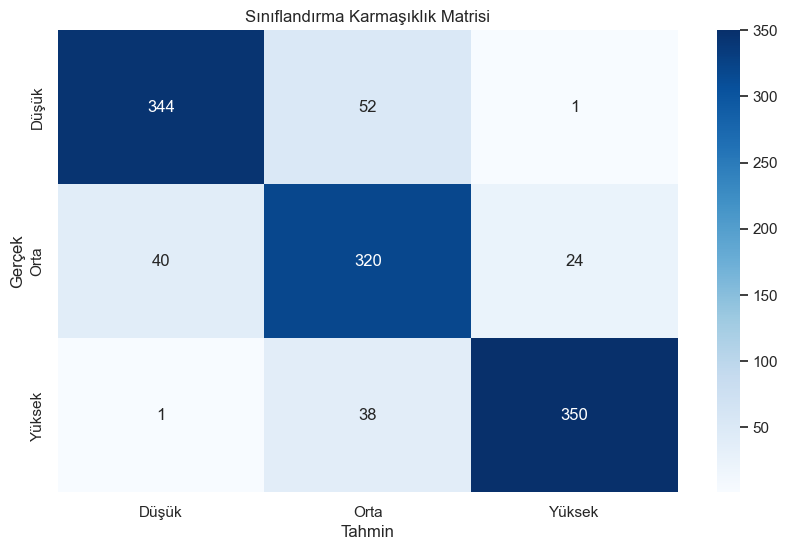

In [692]:
# Karmaşıklık matrisini görselleştirmek performnası daha iyi anlamamızı sağlar.
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test_labels, y_pred_labels), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Sınıflandırma Karmaşıklık Matrisi')
plt.show()

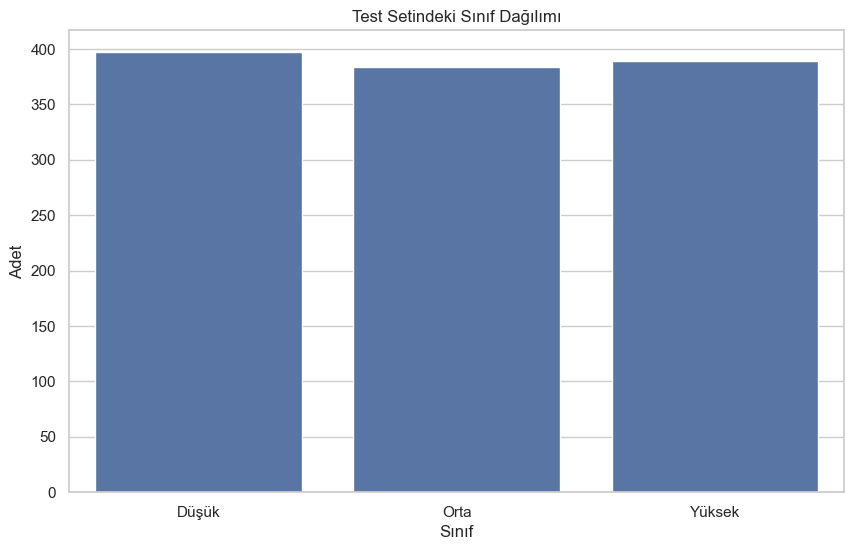

In [693]:
plt.figure(figsize=(10,6))
sns.countplot(x=y_test_labels, order=le.classes_)
plt.title("Test Setindeki Sınıf Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Adet")
plt.show()

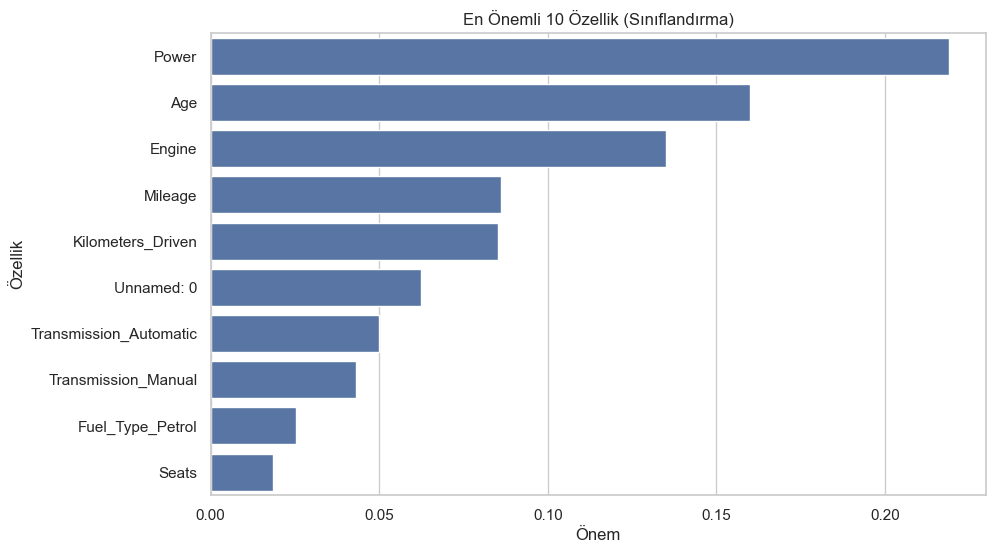

In [694]:
# Önemli özelliklerin neler olduğuna bakarak modelin nelere dikkat ettiğini anlayabiliriz.
feature_names = numeric_cols + list(
    clf_model.named_steps['preprocessor'].transformers_[1][1]
    .named_steps['onehot'].get_feature_names_out(categorical_cols)
)
importances = clf_model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=np.array(feature_names)[indices][:10])
plt.title("En Önemli 10 Özellik (Sınıflandırma)")
plt.xlabel("Önem")
plt.ylabel("Özellik")
plt.show()

In [695]:
# 3) Random Forest Regresyon Modeli ile Karşılaştırma
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf_model.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_model.predict(X_test_reg)

# Karşılaştırma metrikleri
r2_rf = r2_score(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)

print(f"RandomForestRegressor R2 skoru: {r2_rf:.3f}")
print(f"RandomForestRegressor RMSE: {rmse_rf:.3f}")
print(f"RandomForestRegressor MSE: {mse_rf:.3f}")
print(f"RandomForestRegressor MAE: {mae_rf:.3f}")

RandomForestRegressor R2 skoru: 0.882
RandomForestRegressor RMSE: 3.706
RandomForestRegressor MSE: 13.736
RandomForestRegressor MAE: 1.545


In [696]:
df_compare_rf = pd.DataFrame({
    'Gerçek Fiyat': y_test_reg,
    'Tahmini Fiyat (RF)': y_pred_rf,
    'Fark': abs(y_test_reg - y_pred_rf)
})
print(df_compare_rf.sort_values(by='Fark', ascending=False).head(10))

      Gerçek Fiyat  Tahmini Fiyat (RF)     Fark
5620        120.00             51.7468  68.2532
4844         48.00             89.3924  41.3924
4921         58.91             33.5490  25.3610
3164         48.00             70.5778  22.5778
3431         44.50             26.6725  17.8275
208          45.00             28.0063  16.9937
776          56.00             39.9783  16.0217
4522         52.00             36.2918  15.7082
2251         78.80             63.1246  15.6754
1620         32.95             48.1865  15.2365


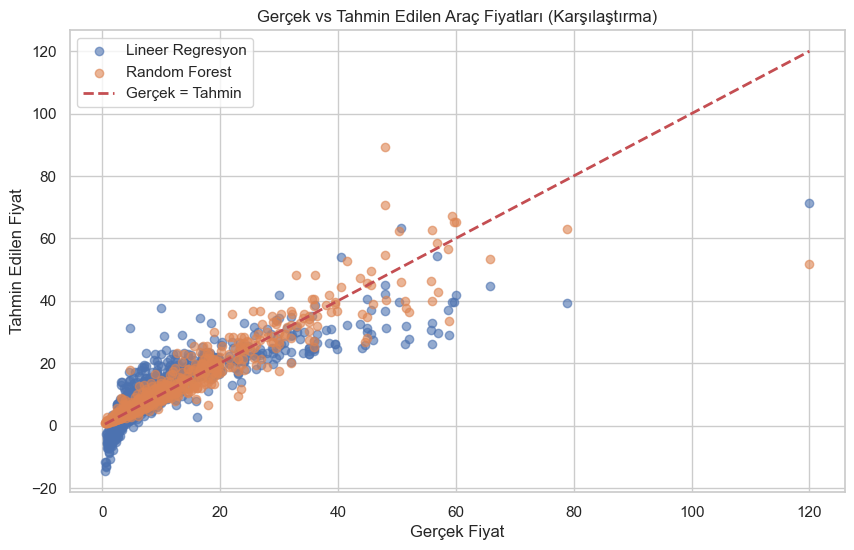

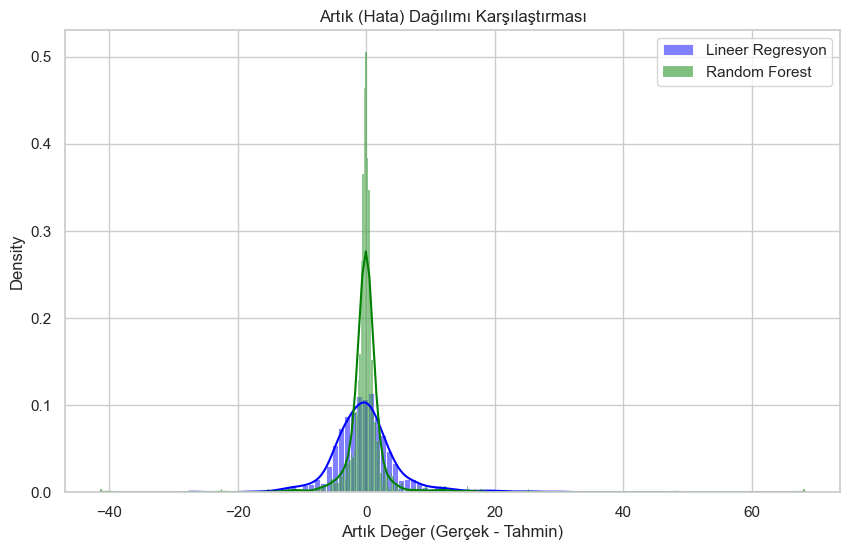

In [697]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, label='Lineer Regresyon')
plt.scatter(y_test_reg, y_pred_rf, alpha=0.6, label='Random Forest')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2, label='Gerçek = Tahmin')
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen Araç Fiyatları (Karşılaştırma)")
plt.legend()
plt.grid(True)
plt.show()

# Artık (hata) dağılımlarını da karşılaştırıp hata konusunda hangisinin iyi olduğunu görebiliriz.
residuals_rf = y_test_reg - y_pred_rf
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='blue', label='Lineer Regresyon', stat='density')
sns.histplot(residuals_rf, kde=True, color='green', label='Random Forest', stat='density')
plt.title("Artık (Hata) Dağılımı Karşılaştırması")
plt.xlabel("Artık Değer (Gerçek - Tahmin)")
plt.legend()
plt.show()

In [698]:
import joblib

joblib.dump(rf_model, 'fiyat_tahmin_modeli.pkl')


['fiyat_tahmin_modeli.pkl']